In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [66]:
#présenter le jeu de données

#rapport technique (pas besoin de faire des intro)
#    - détailler les expériences 

In [67]:
def remove_heavilyCorr_normalize_df(df):
    scaler = StandardScaler()
    df.columns = df.columns.str.strip()
    df=df.drop(columns=['Net Income Flag','Liability-Assets Flag'],axis=1) # Drop the column with only one value
    df_X = df.drop(columns=['Bankrupt?'])
    df_X = pd.DataFrame(scaler.fit_transform(df_X), columns=df_X.columns)
    df_y = df['Bankrupt?']
    cols_remove=['ROA(A) before interest and % after tax',
 'Net Value Per Share (A)',
 'Operating Profit Per Share (Yuan ¥)',
 'ROA(B) before interest and depreciation after tax',
 'Per Share Net profit before tax (Yuan ¥)',
 'Operating profit/Paid-in capital',
 'Net Value Per Share (C)',
 'Persistent EPS in the Last Four Seasons',
 'ROA(C) before interest and depreciation before interest',
 'Net Value Per Share (B)',
 'Net profit before tax/Paid-in capital',
 'Retained Earnings to Total Assets',
 'Operating Gross Margin',
 'Realized Sales Gross Margin',
 'Continuous interest rate (after tax)',
 'After-tax net Interest Rate',
 'Pre-tax net Interest Rate',
 'Non-industry income and expenditure/revenue',
 'Working capitcal Turnover Rate',
 'Cash Reinvestment %',
 'Cash Flow Per Share',
 'Operating Funds to Liability',
 'CFO to Assets',
 'After-tax Net Profit Growth Rate',
 'Current Liability to Assets',
 'Debt ratio %',
 'Inventory and accounts receivable/Net value',
 'Current Liabilities/Equity',
 'Borrowing dependency',
 'Current Liability to Equity',
 "Net Income to Stockholder's Equity",
 'Equity to Long-term Liability',
 'Contingent liabilities/Net worth',
 'Net Worth Turnover Rate (times)',
 'Working Capital to Total Assets',
 'Quick Assets/Total Assets',
 'Current Liabilities/Liability',
 'Cash Flow to Liability']
    df_X=df_X.drop(columns=cols_remove,axis=1)
    return df_X,df_y

df = pd.read_csv('data.csv',sep=',')
df_X,df_y=remove_heavilyCorr_normalize_df(df)

In [68]:
"""
from sklearn.preprocessing import StandardScaler
import sweetviz as sv
df = pd.read_csv('data.csv',sep=',')
analyze_report = sv.analyze(df)
analyze_report.show_html('report_original_data.html', open_browser=False)

scaler = StandardScaler()
df=df.drop(columns=['Bankrupt?'])
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
analyze_report = sv.analyze(df)
analyze_report.show_html('report_normalized_data.html', open_browser=False)
"""

"\nfrom sklearn.preprocessing import StandardScaler\nimport sweetviz as sv\ndf = pd.read_csv('data.csv',sep=',')\nanalyze_report = sv.analyze(df)\nanalyze_report.show_html('report_original_data.html', open_browser=False)\n\nscaler = StandardScaler()\ndf=df.drop(columns=['Bankrupt?'])\ndf = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)\nanalyze_report = sv.analyze(df)\nanalyze_report.show_html('report_normalized_data.html', open_browser=False)\n"

In [69]:
df = pd.read_csv('data.csv',sep=',')
df.corr()[abs(df.corr())>0.4].loc[:,' Revenue Per Share (Yuan ¥)'].sum()

1.0

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
# Load the data
df = pd.read_csv('data.csv',sep=',')
# réctifier les noms des colonnes
df.columns = df.columns.str.strip()
df=df.drop(columns=['Net Income Flag','Liability-Assets Flag'],axis=1) # Drop the column with only one value

## ignorer #####
#Only_categorigal_column=df['Liability-Assets Flag'].copy()
###############
#df=df.drop(columns=['Liability-Assets Flag'],axis=1) # Supprimer cette variable qualitative car elle n'apporte pas d'information utile.

# normaliser les données
original_df_X=df.drop(columns=['Bankrupt?']).copy()
scaler = StandardScaler()


#### ignorer ######
df_X = df.drop(columns=['Bankrupt?'])
df_X = pd.DataFrame(scaler.fit_transform(df_X), columns=df_X.columns)
df_y = df['Bankrupt?']
####################


In [71]:
strong_corr_threshold = 0.7
pd_corr=df_X.corr()
np.fill_diagonal(pd_corr.values, 0)
high_corr=pd_corr[abs(pd_corr)>strong_corr_threshold]
#high_corr=high_corr.stack().reset_index()
#high_corr=high_corr.rename(columns={'level_0':'Feature 1','level_1':'Feature 2',0:'Correlation Coefficient'})

list_high_corr=[]
for i in range(len(high_corr)):
    tempo_list=[]
    tempo_list.append(high_corr.index[i])
    for j in range(len(high_corr.columns)):
        if abs(high_corr.iloc[i,j])>strong_corr_threshold:
            tempo_list.append(high_corr.columns[j])
    if len(tempo_list)>1:
        list_high_corr.append(tempo_list)


In [72]:
from collections import defaultdict, deque


strong_corr_threshold = 0.7
pd_corr=df_X.corr()
np.fill_diagonal(pd_corr.values, 0)
high_corr=pd_corr[abs(pd_corr)>strong_corr_threshold]
#high_corr=high_corr.stack().reset_index()
#high_corr=high_corr.rename(columns={'level_0':'Feature 1','level_1':'Feature 2',0:'Correlation Coefficient'})

list_high_corr=[]
for i in range(len(high_corr)):
    tempo_list=[]
    tempo_list.append(high_corr.index[i])
    for j in range(len(high_corr.columns)):
        if abs(high_corr.iloc[i,j])>strong_corr_threshold:
            tempo_list.append(high_corr.columns[j])
    if len(tempo_list)>1:
        list_high_corr.append(tempo_list)

def group_lists(lists):
    #graph
    element_to_list_ids = defaultdict(set)
    list_id_to_elements = {}
    
    for i, lst in enumerate(lists):
        list_id_to_elements[i] = set(lst)
        for element in lst:
            element_to_list_ids[element].add(i)

    #BFS
    visited = set()
    def bfs(start):
        queue = deque([start])
        component = []
        while queue:
            node = queue.popleft()
            if node not in visited:
                visited.add(node)
                component.append(node)
                for element in list_id_to_elements[node]:
                    for neighbor in element_to_list_ids[element]:
                        if neighbor not in visited:
                            queue.append(neighbor)
        return component

    components = []
    for list_id in range(len(lists)):
        if list_id not in visited:
            components.append(bfs(list_id))

    # regroupement des listes
    grouped_lists = []
    for component in components:
        combined_set = set()
        for list_id in component:
            combined_set.update(list_id_to_elements[list_id])
        grouped_lists.append(list(combined_set))

    return grouped_lists

grouped = group_lists(list_high_corr)
grouped


[['Persistent EPS in the Last Four Seasons',
  'Operating profit/Paid-in capital',
  'Net profit before tax/Paid-in capital',
  'Net Value Per Share (B)',
  'Retained Earnings to Total Assets',
  'ROA(A) before interest and % after tax',
  'Net Value Per Share (C)',
  'Net Income to Total Assets',
  'ROA(C) before interest and depreciation before interest',
  'Net Value Per Share (A)',
  'Per Share Net profit before tax (Yuan ¥)',
  'Operating Profit Per Share (Yuan ¥)',
  'ROA(B) before interest and depreciation after tax'],
 ['Realized Sales Gross Margin',
  'Gross Profit to Sales',
  'Operating Gross Margin'],
 ['Operating Profit Rate',
  'Pre-tax net Interest Rate',
  'After-tax net Interest Rate',
  'Continuous interest rate (after tax)'],
 ['Working capitcal Turnover Rate',
  'Non-industry income and expenditure/revenue',
  'Cash Flow to Sales'],
 ['Operating Funds to Liability',
  'Cash Reinvestment %',
  'Cash flow rate',
  'Cash Flow Per Share',
  'CFO to Assets'],
 ['Regular 

In [73]:
elems=0
for x in grouped:
    for y in x:
        elems+=1
print(elems)
93-51+13

51


55

In [74]:

columns_to_keep=['Net Income to Total Assets',
 'Gross Profit to Sales',
 'Operating Profit Rate',
 'Cash Flow to Sales',
 'Cash flow rate',
 'Regular Net Profit Growth Rate',
 'Net worth/Assets',
 'Liability to Equity',
 'Working Capital/Equity',
 'Total Asset Turnover',
 'Current Assets/Total Assets',
 'Current Liability to Liability',
 'Cash Flow to Total Assets'
]
merged_columns = [x for sublist in grouped for x in sublist]

# columns to keep : 
#columns_to_keep=["Net Value Per Share (A)","Gross Profit to Sales","After-tax Net Profit Growth Rate","Persistent EPS in the Last Four Seasons","Debt ratio %",
#                "After-tax net Interest Rate",'Operating Funds to Liability','Net Income to Total Assets','Cash Flow to Sales','Liability to Equity','Current Liability to Liability']
columns_nonCorrelated=[x for x in list(df_X.columns) if x not in merged_columns]
columns_nonCorrelated.extend(columns_to_keep)
#df_X=df_X[columns_nonCorrelated]
df_X
#############################################################################
#############################################################################
#############################################################################

ROA(C) before interest and depreciation before interest  \
0                                             -2.217909         
1                                             -0.673828         
2                                             -1.303672         
3                                             -1.735886         
4                                             -0.661778         
...                                                 ...         
6814                                          -0.189395         
6815                                          -0.494676         
6816                                          -0.534845         
6817                                           0.017875         
6818                                          -0.199839         

      ROA(A) before interest and % after tax  \
0                                  -2.045798   
1                                  -0.311068   
2                                  -0.908420   
3                                  -1.636209   
4                                  -0.307745   
...                                      ...   
6814                               -0.291959   
6815                               -0.310237   
6816                               -0.379194   
6817                                0.019594   
6818                                0.174956   

      ROA(B) before interest and depreciation after tax  \
0                                             -2.400361   
1                                             -0.598450   
2                                             -1.319910   
3                                             -1.556340   
4                                             -0.508050   
...                                                 ...   
6814                                          -0.168181   
6815                                          -0.477627   
6816                                          -0.534996   
6817                                           0.007403   
6818                                          -0.065612   

      Operating Gross Margin  Realized Sales Gross Margin  \
0                  -0.383334                    -0.382638   
1                   0.135068                     0.136307   
2                  -0.383759                    -0.388177   
3                  -1.441418                    -1.441832   
4                  -0.541238                    -0.540708   
...                      ...                          ...   
6814               -0.206277                    -0.204969   
6815               -0.569328                    -0.568828   
6816                0.147411                     0.135029   
6817               -0.005811                    -0.004720   
6818                1.149313                     1.151617   

      Operating Profit Rate  Pre-tax net Interest Rate  \
0                  0.016456                  -0.023516   
1                  0.014671                   0.014799   
2                  0.007858                  -0.061111   
3                 -0.004257                  -0.017313   
4                  0.016758                   0.013703   
...                     ...                        ...   
6814               0.018215                   0.017036   
6815               0.018223                   0.017455   
6816               0.017628                   0.016412   
6817               0.024494                   0.024099   
6818              -0.051874                   0.372776   

      After-tax net Interest Rate  \
0                       -0.020165   
1                        0.015966   
2                       -0.051183   
3                       -0.008676   
4                        0.016186   
...                           ...   
6814                     0.018197   
6815                     0.017919   
6816                     0.017153   
6817                     0.023223   
6818                     0.346771   

      Non-industry income and expenditure/revenue  \
0          

In [75]:
cols_remove=[x for x in merged_columns if x not in columns_to_keep]
cols_remove

['Persistent EPS in the Last Four Seasons',
 'Operating profit/Paid-in capital',
 'Net profit before tax/Paid-in capital',
 'Net Value Per Share (B)',
 'Retained Earnings to Total Assets',
 'ROA(A) before interest and % after tax',
 'Net Value Per Share (C)',
 'ROA(C) before interest and depreciation before interest',
 'Net Value Per Share (A)',
 'Per Share Net profit before tax (Yuan ¥)',
 'Operating Profit Per Share (Yuan ¥)',
 'ROA(B) before interest and depreciation after tax',
 'Realized Sales Gross Margin',
 'Operating Gross Margin',
 'Pre-tax net Interest Rate',
 'After-tax net Interest Rate',
 'Continuous interest rate (after tax)',
 'Working capitcal Turnover Rate',
 'Non-industry income and expenditure/revenue',
 'Operating Funds to Liability',
 'Cash Reinvestment %',
 'Cash Flow Per Share',
 'CFO to Assets',
 'After-tax Net Profit Growth Rate',
 'Current Liability to Assets',
 'Debt ratio %',
 'Inventory and accounts receivable/Net value',
 "Net Income to Stockholder's Equit

var de Operating Funds to Liability : 1.000146670577882
var de Cash flow rate : 1.0001466705778819


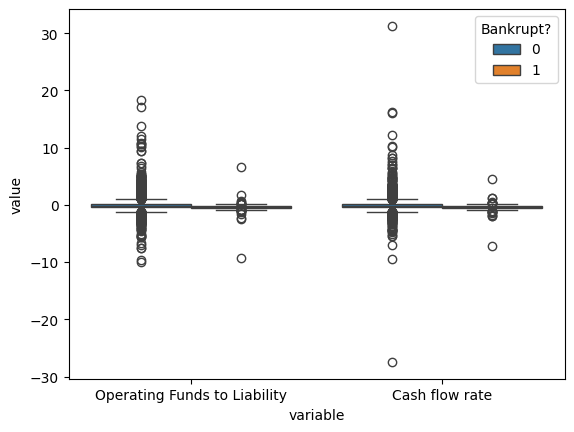

In [76]:

df_tempo_viz=pd.concat([df_X[['Operating Funds to Liability','Cash flow rate']],df_y,],axis=1).melt(id_vars='Bankrupt?')
sns.boxplot(data=df_tempo_viz, y='value', x='variable', hue='Bankrupt?')
plt.plot()
print("var de Operating Funds to Liability :",df_X['Operating Funds to Liability'].var())
print("var de Cash flow rate :",df_X['Cash flow rate'].var())
# D'après la visualisation, on ne peut pas différencier les deux prédicteurs à partir de leur corrélation avec la variable cible
# Mais on peut les différencier à partir de leur variance, donc on va garder le prédicteur qui a la plus grande variance, soit Operating Funds to Liability

In [77]:
# variable cible 
df_y.value_counts(normalize=True)
# nous pourrions dire que la variable cible est TROP déséquilibrée

Bankrupt?
0    0.967737
1    0.032263
Name: proportion, dtype: float64

In [78]:
# prédicteur catégoriel : [Liability-Assets Flag, Net Income Flag]

#print(df["Net Income Flag"].value_counts(normalize=True))
# la colonne Net Income Flag est inutile car elle ne contient qu'une seule valeur unique (constante), donc nous devons la supprimer

#print(df["Liability-Assets Flag"].value_counts())
#print("\n\n")

# regardons la relation entre liability-asset flag et la variable cible
#df = pd.read_csv('data.csv',sep=',')
# table de contingence
#print(pd.crosstab(Only_categorigal_column,df["Bankrupt?"]))
#print("pourcentage de vrais positifs et de vrais négatifs", (Only_categorigal_column == df["Bankrupt?"]).mean())
# visualisation
#sns.heatmap(pd.crosstab(Only_categorigal_column,df["Bankrupt?"]),annot=True)
#plt.show()
########### !!!!!!!!!!!!!!!!!!!!!!!!!!!! problème ici, à revoir !
# analysons les résultats de la table de contingence
# - Pour les cas où Liability-Assets Flag = 1, 6 cas de faillite sur 8, soit 75% de faillite et 25% de non-faillite
# - Pour les cas où Liability-Assets Flag = 0, 214 cas de faillite sur 6 811, soit 0.03% de faillite et 99.97% de non-faillite, à noter que la variable cible est déséquilibrée (0.03% de faillite et 99.97% de non-faillite)
# ????? # Alors nous pouvons dire que la variable Liability-Assets Flag n'est pas utile pour prédire la variable cible, bien qu'on pourrait penser autrement en regardant la table de contingence, mais la variable cible est déséquilibrée
# ??? les experts du domaine trouve que la variable Liability-Assets Flag est utile pour prédire la variable cible
# faux négtifs est : 214/214+2

In [79]:
214/(214+2)

0.9907407407407407

In [80]:
strong_corr_threshold = 0.5
pd_corr=df_X.corr()
np.fill_diagonal(pd_corr.values, 0)
high_corr=pd_corr[abs(pd_corr)>strong_corr_threshold]
high_corr=high_corr.stack().reset_index()
high_corr=high_corr.rename(columns={'level_0':'Feature 1','level_1':'Feature 2',0:'Correlation Coefficient'})
#high_corr['Feature_Pair']=high_corr.apply(lambda row: set((row["Feature 1"],row["Feature 2"])),axis=1)
#high_corr.drop_duplicates(subset=['Feature_Pair']).reset_index(drop=True)
#high_corr

In [81]:
#for val_cor in [0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]:
strong_corr_threshold = 0.7#val_cor
pd_corr=df_X.corr()
np.fill_diagonal(pd_corr.values, 0)
high_corr=pd_corr[abs(pd_corr)>strong_corr_threshold]
high_corr=high_corr.stack().reset_index()
high_corr=high_corr.rename(columns={'level_0':'Feature 1','level_1':'Feature 2',0:'Correlation Coefficient'})

dict_values={}

def update_dict(row):
    if row['Feature 1'] not in dict_values.keys():
        dict_values[row['Feature 1']]=[]
    dict_values[row['Feature 1']].append(row['Feature 2'])
    if row['Feature 2'] not in dict_values.keys():
        dict_values[row['Feature 2']]=[]
    dict_values[row['Feature 2']].append(row['Feature 1'])
    return True

high_corr.apply(lambda x: update_dict(x),axis=1)

# Convert the values to set
for x in dict_values.keys():
    dict_values[x]=set(dict_values[x])

# Merge the sets
for x in dict_values.keys():
    for y in dict_values[x]:
        dict_values[x]=dict_values[x].union(dict_values[y])
    dict_values[x].add(x)
dict_values

#set of families of correlated features
set_families=set()
for x in dict_values.keys():
    set_families.add(frozenset(dict_values[x]))
set_families

a=0
b=0
for x in set_families:
    b+=1
    for y in x:
        a+=1
print(a)
set_families
print(b)
set_families



58
15


{frozenset({'CFO to Assets',
            'Cash flow rate',
            'Operating Funds to Liability'}),
 frozenset({'Current Liabilities/Liability',
            'Current Liability to Liability'}),
 frozenset({'Gross Profit to Sales',
            'Operating Gross Margin',
            'Realized Sales Gross Margin'}),
 frozenset({'Net Worth Turnover Rate (times)', 'Total Asset Turnover'}),
 frozenset({'After-tax net Interest Rate',
            'Continuous interest rate (after tax)',
            'Operating Profit Rate',
            'Pre-tax net Interest Rate'}),
 frozenset({'Borrowing dependency',
            'Current Liabilities/Equity',
            'Current Liability to Equity',
            'Equity to Long-term Liability',
            'Inventory and accounts receivable/Net value',
            'Liability to Equity',
            "Net Income to Stockholder's Equity"}),
 frozenset({'Current Liability to Assets',
            'Debt ratio %',
            'Net worth/Assets'}),
 frozenset({'CFO 

In [82]:
"""
list_set_families=[]
merged_columns=[]
for x in set_families:
    list_set_families.append(list(x))
    for y in x:
        merged_columns.append(y)
list_set_families
# columns to keep : 
columns_to_keep=["Net Value Per Share (A)","Gross Profit to Sales","After-tax Net Profit Growth Rate","Persistent EPS in the Last Four Seasons","Debt ratio %",
                "After-tax net Interest Rate",'Operating Funds to Liability','Net Income to Total Assets','Cash Flow to Sales','Liability to Equity','Current Liability to Liability']
columns_nonCorrelated=[x for x in list(df_X.columns) if x not in merged_columns]
columns_nonCorrelated.extend(columns_to_keep)

df_X[columns_nonCorrelated].corr()[abs(df_X[columns_nonCorrelated].corr())>0.8].isna().sum().sum()
#df_X=df_X[columns_nonCorrelated]
"""

'\nlist_set_families=[]\nmerged_columns=[]\nfor x in set_families:\n    list_set_families.append(list(x))\n    for y in x:\n        merged_columns.append(y)\nlist_set_families\n# columns to keep : \ncolumns_to_keep=["Net Value Per Share (A)","Gross Profit to Sales","After-tax Net Profit Growth Rate","Persistent EPS in the Last Four Seasons","Debt ratio %",\n                "After-tax net Interest Rate",\'Operating Funds to Liability\',\'Net Income to Total Assets\',\'Cash Flow to Sales\',\'Liability to Equity\',\'Current Liability to Liability\']\ncolumns_nonCorrelated=[x for x in list(df_X.columns) if x not in merged_columns]\ncolumns_nonCorrelated.extend(columns_to_keep)\n\ndf_X[columns_nonCorrelated].corr()[abs(df_X[columns_nonCorrelated].corr())>0.8].isna().sum().sum()\n#df_X=df_X[columns_nonCorrelated]\n'

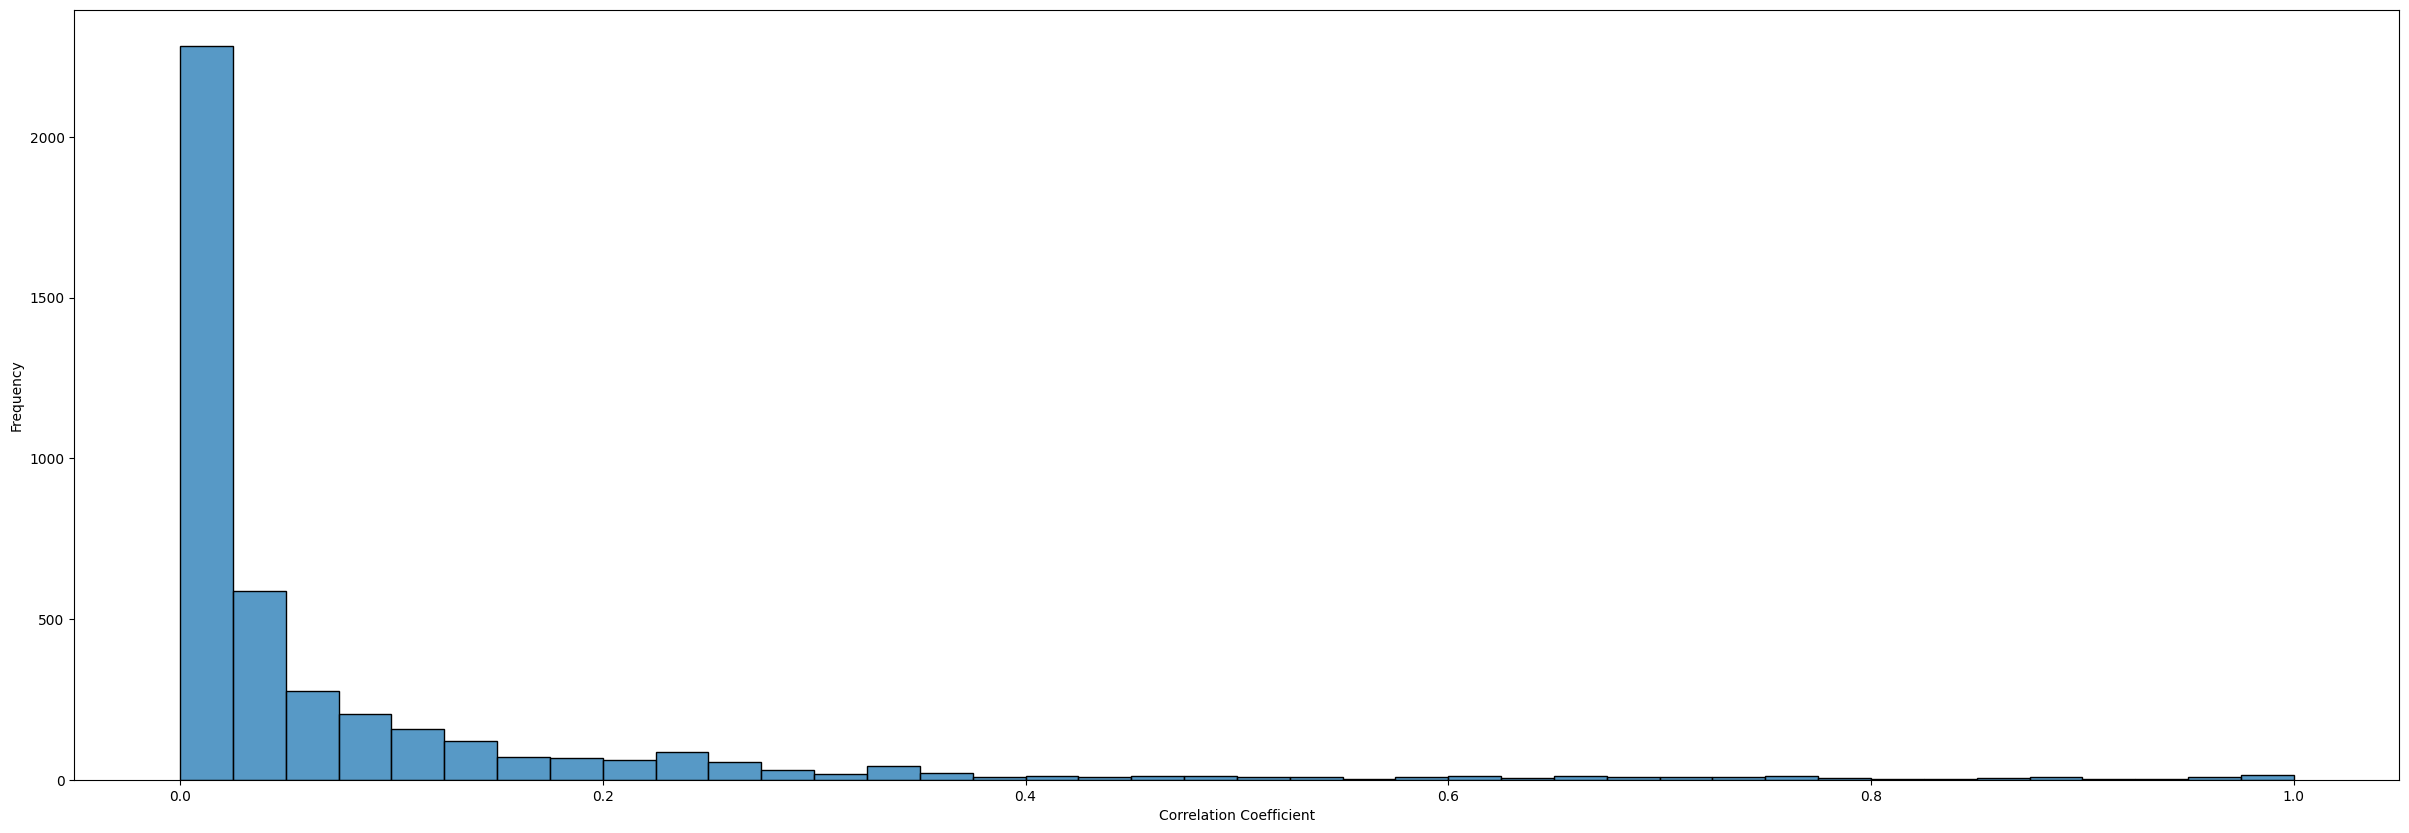

In [83]:
#list_all_values_corr=abs(df_X.corr()).values.flatten()
#sns.histplot(list_all_values_corr)

lower_tri_indices = np.tril_indices_from(df_X.corr(), k=-1)
list_all_values_corr = abs(df_X.corr()).values[lower_tri_indices].flatten()
# make this figure bigger
plt.figure(figsize=(30,10))
sns.histplot(list_all_values_corr,bins=40)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Frequency')
plt.show()

In [84]:
# Après la suppresion des prédicteurs corrélées linéarement, regardons s'il y a des prédicteurs corrélées non linéarement


In [85]:
# PCA
# effectuer une PCA sur tous les prédicteurs 
# visualiser la variance expliquée par chaque composante principale
# choisir le nombre de composantes principales à garder
# voir si c'est possible de faire un mapping entre les composantes principales et les prédicteurs originaux

C:\Users\Ad\AppData\Local\Temp\ipykernel_5364\3867062224.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(1, n_comp+1), y=cumulative_variance, palette="viridis")


[]

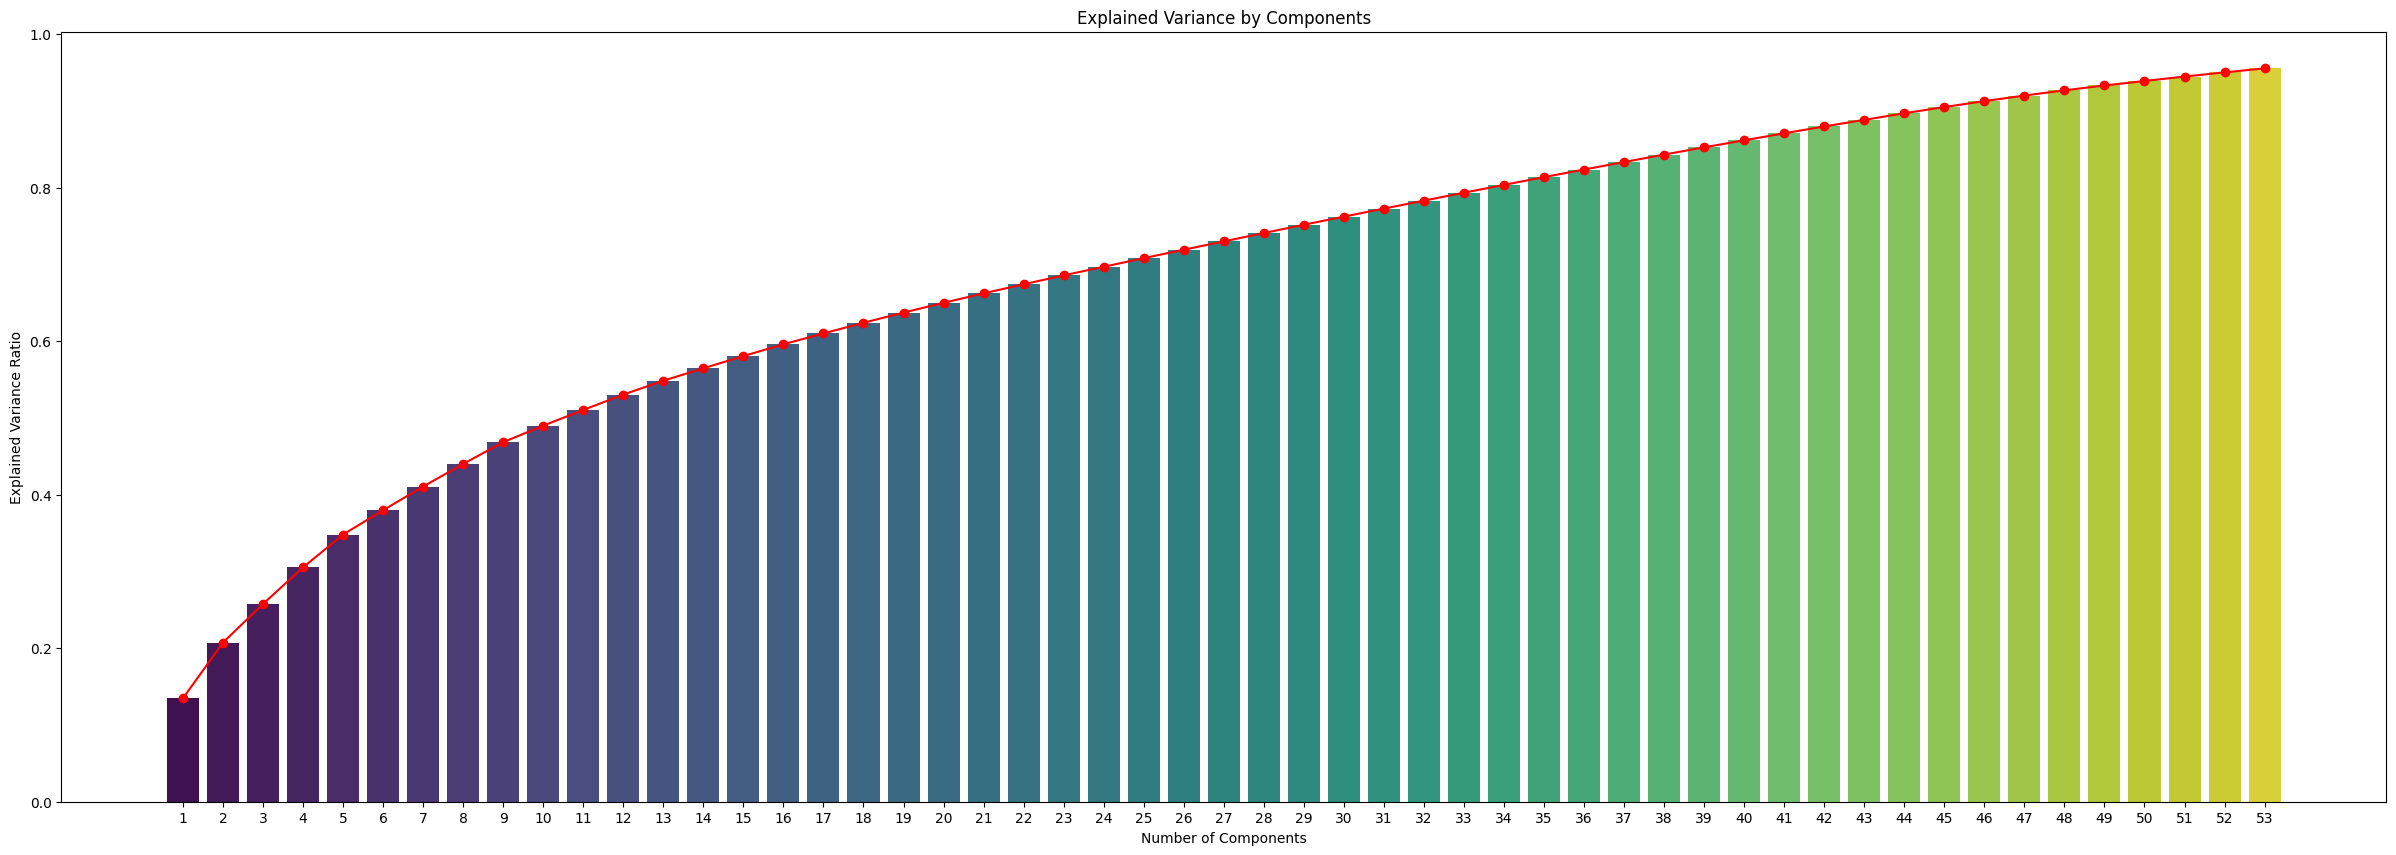

In [86]:
# implement PCA from sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
std_scaler = StandardScaler()

df_scaled=std_scaler.fit_transform(df_X.to_numpy())
n_comp=53
pca=PCA(n_components=n_comp)
pca.fit(df_scaled)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(30, 10))
sns.barplot(x=np.arange(1, n_comp+1), y=cumulative_variance, palette="viridis")
plt.plot(np.arange(0, n_comp), cumulative_variance, marker='o', linestyle='-', color='r')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.plot()
#plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [87]:
cumulative_variance

array([0.13481761, 0.20738124, 0.25767543, 0.30529262, 0.3480951 ,
       0.37979811, 0.41061614, 0.44013988, 0.46840371, 0.48998063,
       0.51036334, 0.53040989, 0.54848549, 0.56464823, 0.58059246,
       0.59598937, 0.61011254, 0.62395701, 0.63723086, 0.64994917,
       0.66232089, 0.67410085, 0.68569972, 0.69692837, 0.70813407,
       0.71913162, 0.72999843, 0.74084171, 0.75166088, 0.76225431,
       0.77273154, 0.783108  , 0.7934064 , 0.80363024, 0.81371505,
       0.82359298, 0.83336755, 0.84308052, 0.85254054, 0.86169145,
       0.87078626, 0.87970913, 0.8883302 , 0.89687703, 0.90500835,
       0.91271548, 0.91997843, 0.92678233, 0.93310154, 0.93894538,
       0.94474949, 0.95016344, 0.95538583])

C:\Users\Ad\AppData\Local\Temp\ipykernel_5364\849223980.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(1, n_comp+1), y=cumulative_variance, palette="viridis")


[]

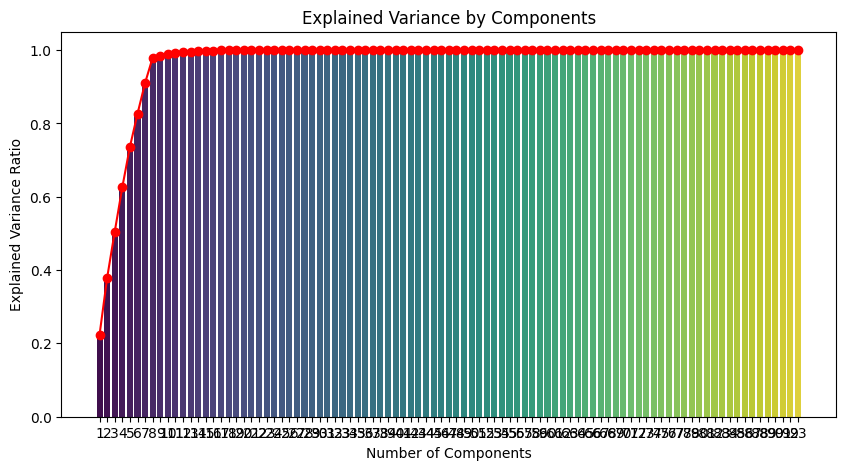

In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
std_scaler = StandardScaler()

#df_scaled=std_scaler.fit_transform(df_X.to_numpy())
n_comp=93
pca=PCA(n_components=n_comp)
pca.fit(original_df_X)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 5))
sns.barplot(x=np.arange(1, n_comp+1), y=cumulative_variance, palette="viridis")
plt.plot(np.arange(0, n_comp), cumulative_variance, marker='o', linestyle='-', color='r')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.plot()

In [89]:
np.cumsum((pca.explained_variance_ratio_)[0:25])

array([0.22342624, 0.37878837, 0.50446157, 0.62605576, 0.73601128,
       0.82628441, 0.91035768, 0.97958023, 0.98428265, 0.98880498,
       0.99243635, 0.9944334 , 0.9956422 , 0.99668651, 0.99759961,
       0.99840637, 0.99881912, 0.99921357, 0.9994741 , 0.99965359,
       0.99981534, 0.99995309, 0.99998455, 1.        , 1.        ])

C:\Users\Ad\AppData\Local\Temp\ipykernel_5364\3475382843.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(1, n_comp+1), y=cumulative_variance, palette="viridis")


array([0.13481761, 0.20738124, 0.25767543, 0.30529262, 0.3480951 ,
       0.37979811, 0.41061614, 0.44013988, 0.46840371, 0.48998063,
       0.51036334, 0.53040989, 0.54848549, 0.56464823, 0.58059246,
       0.59598937, 0.61011254, 0.62395701, 0.63723087, 0.64994917,
       0.66232089, 0.67410085, 0.68569973, 0.69692837, 0.70813408])

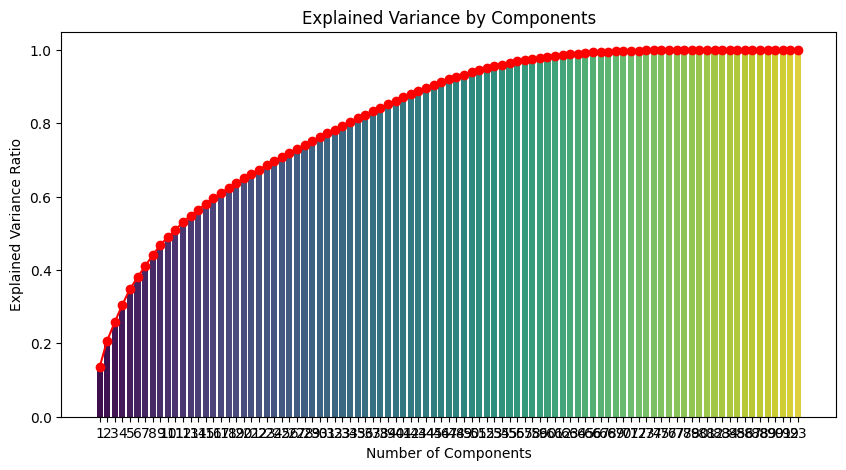

In [90]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
std_scaler = StandardScaler()

df_scaled=std_scaler.fit_transform(df_X.to_numpy())
n_comp=93
pca=PCA(n_components=n_comp)
pca.fit(df_scaled)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 5))
sns.barplot(x=np.arange(1, n_comp+1), y=cumulative_variance, palette="viridis")
plt.plot(np.arange(0, n_comp), cumulative_variance, marker='o', linestyle='-', color='r')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.plot()
np.cumsum((pca.explained_variance_ratio_)[0:25])

In [91]:
np.cumsum((pca.explained_variance_ratio_)[0:64])

array([0.13481761, 0.20738124, 0.25767543, 0.30529262, 0.3480951 ,
       0.37979811, 0.41061614, 0.44013988, 0.46840371, 0.48998063,
       0.51036334, 0.53040989, 0.54848549, 0.56464823, 0.58059246,
       0.59598937, 0.61011254, 0.62395701, 0.63723087, 0.64994917,
       0.66232089, 0.67410085, 0.68569973, 0.69692837, 0.70813408,
       0.71913163, 0.72999845, 0.74084173, 0.7516609 , 0.76225433,
       0.77273156, 0.78310802, 0.79340643, 0.80363027, 0.81371508,
       0.823593  , 0.83336758, 0.84308056, 0.85254057, 0.86169149,
       0.87078631, 0.87970918, 0.88833026, 0.89687709, 0.90500841,
       0.91271555, 0.91997859, 0.92678249, 0.93310172, 0.93894556,
       0.94474976, 0.95016372, 0.95538645, 0.96015122, 0.96466608,
       0.96905909, 0.97296436, 0.97646565, 0.97961115, 0.98230317,
       0.98462584, 0.98693378, 0.98876453, 0.99055244])

C:\Users\Ad\AppData\Local\Temp\ipykernel_5364\1070186737.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(1, n_comp+1), y=cumulative_variance_scaled, palette="viridis")


[]

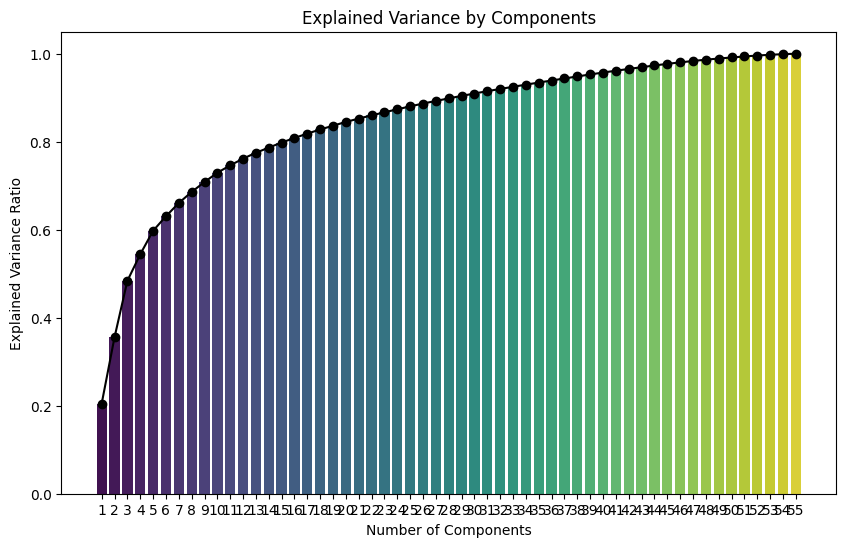

In [92]:
# comment attaquer le problème de la variable cible déséquilibrée

def remove_heavilyCorr_normalize_df(df):
    scaler = StandardScaler()
    df.columns = df.columns.str.strip()
    df=df.drop(columns=['Net Income Flag','Liability-Assets Flag'],axis=1) # Drop the column with only one value
    df_X = df.drop(columns=['Bankrupt?'])
    df_X = pd.DataFrame(scaler.fit_transform(df_X), columns=df_X.columns)
    df_y = df['Bankrupt?']
    cols_remove=['ROA(A) before interest and % after tax',
 'Net Value Per Share (A)',
 'Operating Profit Per Share (Yuan ¥)',
 'ROA(B) before interest and depreciation after tax',
 'Per Share Net profit before tax (Yuan ¥)',
 'Operating profit/Paid-in capital',
 'Net Value Per Share (C)',
 'Persistent EPS in the Last Four Seasons',
 'ROA(C) before interest and depreciation before interest',
 'Net Value Per Share (B)',
 'Net profit before tax/Paid-in capital',
 'Retained Earnings to Total Assets',
 'Operating Gross Margin',
 'Realized Sales Gross Margin',
 'Continuous interest rate (after tax)',
 'After-tax net Interest Rate',
 'Pre-tax net Interest Rate',
 'Non-industry income and expenditure/revenue',
 'Working capitcal Turnover Rate',
 'Cash Reinvestment %',
 'Cash Flow Per Share',
 'Operating Funds to Liability',
 'CFO to Assets',
 'After-tax Net Profit Growth Rate',
 'Current Liability to Assets',
 'Debt ratio %',
 'Inventory and accounts receivable/Net value',
 'Current Liabilities/Equity',
 'Borrowing dependency',
 'Current Liability to Equity',
 "Net Income to Stockholder's Equity",
 'Equity to Long-term Liability',
 'Contingent liabilities/Net worth',
 'Net Worth Turnover Rate (times)',
 'Working Capital to Total Assets',
 'Quick Assets/Total Assets',
 'Current Liabilities/Liability',
 'Cash Flow to Liability']
    df_X=df_X.drop(columns=cols_remove,axis=1)
    return df_X,df_y

df = pd.read_csv('data.csv',sep=',')
df_X,df_y=remove_heavilyCorr_normalize_df(df)

# on pourrait utiliser des techniques de pondération
n=len(df_y)
# on va attribuer un poids à la classe minoritaire et un poids de n/2 à la classe majoritaire
weight_bankrupt=0.5/220
weight_Non_bankrupt=0.5/6599
# pour chaque ligne de la classe minoritaire, on va attribuer un poids de 15.497
# pour chaque ligne de la classe majoritaire, on va attribuer un poids de 0.516
weights=np.where(df_y==1,weight_bankrupt,weight_Non_bankrupt)
scaled_X = df_X.multiply(np.sqrt(weights), axis=0)
n_comp=55
pca = PCA(n_components=n_comp)
pca.fit(scaled_X)
cumulative_variance_scaled = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
sns.barplot(x=np.arange(1, n_comp+1), y=cumulative_variance_scaled, palette="viridis")
plt.plot(np.arange(0, n_comp), cumulative_variance_scaled, marker='o', linestyle='-', color='black')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.plot()

In [93]:
cumulative_variance_scaled

array([0.20445998, 0.35535019, 0.48377116, 0.54406915, 0.59749674,
       0.63055752, 0.66075233, 0.6858031 , 0.70843322, 0.72950957,
       0.74631359, 0.76153231, 0.7748718 , 0.78664641, 0.79809061,
       0.80850854, 0.81851583, 0.82779897, 0.83644793, 0.84501466,
       0.85265991, 0.85985641, 0.86692658, 0.87369072, 0.88039   ,
       0.88680718, 0.89269751, 0.89853434, 0.90415778, 0.90958574,
       0.91492613, 0.91993143, 0.92484062, 0.92971756, 0.9344781 ,
       0.93913257, 0.94377167, 0.94835716, 0.95290004, 0.95720988,
       0.96138873, 0.96541703, 0.96937974, 0.97328754, 0.9770031 ,
       0.98031165, 0.98352089, 0.98648561, 0.98908214, 0.99143922,
       0.99372708, 0.99595893, 0.99757685, 0.99903267, 1.        ])

In [94]:
#import sweetviz as sv
#analyze_report = sv.analyze(df)
#analyze_report.show_html('report.html', open_browser=False)

In [103]:
pca.components_.T*np.sqrt(pca.explained_variance_)
loading_matrix=pd.DataFrame(pca.components_.T*np.sqrt(pca.explained_variance_),columns=[f'PC{i}' for i in range(1,n_comp+1)],index=df_X.columns)
loading_matrix.iloc[:,0]

Operating Profit Rate                                -0.000035
Operating Expense Rate                               -0.000347
Research and development expense rate                -0.000856
Cash flow rate                                       -0.001063
Interest-bearing debt interest rate                  -0.000358
Tax rate (A)                                         -0.001685
Revenue Per Share (Yuan ¥)                           -0.000069
Realized Sales Gross Profit Growth Rate              -0.000051
Operating Profit Growth Rate                          0.000345
Regular Net Profit Growth Rate                       -0.000232
Continuous Net Profit Growth Rate                    -0.000110
Total Asset Growth Rate                              -0.000740
Net Value Growth Rate                                -0.003666
Total Asset Return Growth Rate Ratio                 -0.000366
Current Ratio                                         0.000012
Quick Ratio                                           0

In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

df = pd.read_csv('data.csv')

df.columns = df.columns.str.strip()
df=df.drop(columns=['Net Income Flag','Liability-Assets Flag'],axis=1) # Drop the column with only one value
df_X=df.drop(columns=['Bankrupt?'],axis=1)
df_Y=df['Bankrupt?']

# normalize the data_X
scaler = StandardScaler()
df_X = pd.DataFrame(scaler.fit_transform(df_X), columns=df_X.columns)

iqr_threshold=0.07
iqr = df_X.quantile(0.75) - df_X.quantile(0.25)
iqr = iqr[iqr < iqr_threshold]
#print("number of columns to drop with 0.07 iqr threshhold",len(iqr))
#print(iqr.index.values.tolist())
list_of_columns_to_drop = iqr.index.values.tolist()
df_X = df_X.drop(columns=list_of_columns_to_drop)

col_drop_0_9_correlation=["ROA(A) before interest and % after tax",
'ROA(B) before interest and depreciation after tax',
'ROA(C) before interest and depreciation before interest',
'Realized Sales Gross Margin',
'Operating Gross Margin',
'Net Value Per Share (C)',
'Net Value Per Share (B)',
'Per Share Net profit before tax (Yuan ¥)',
'Persistent EPS in the Last Four Seasons',
'Operating Profit Per Share (Yuan ¥)',
'Debt ratio %',
'Borrowing dependency',
'Liability to Equity',
'Current Liability to Equity']
df_X = df_X.drop(columns=col_drop_0_9_correlation)

print(df_X.shape)
df_Y.value_counts()


(6819, 40)


Bankrupt?
0    6599
1     220
Name: count, dtype: int64

C:\Users\Ad\AppData\Local\Temp\ipykernel_23464\1236282554.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(1, n_comp+1), y=cumulative_variance_scaled, palette="viridis")


[0.43309544 0.55739147 0.62744697 0.67751089 0.72328813 0.76168319
 0.7916909  0.81624099 0.83415088 0.85121089 0.86566755 0.87846299
 0.88920753 0.8992068  0.90847457 0.91746348 0.92602555 0.93449
 0.94185057 0.94865254 0.95530387 0.9618496  0.96759891 0.97305139
 0.97731462 0.98120575 0.98452306 0.98770007 0.99000256 0.99216773
 0.99424389 0.99576378 0.9969879  0.9980654  0.99891048 0.99943126
 0.9998262  1.         1.         1.        ]


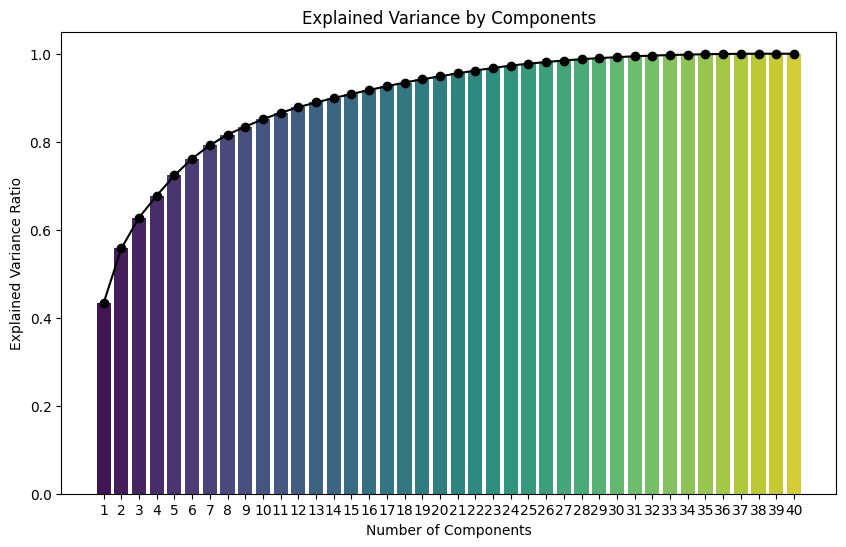

In [27]:

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# on pourrait utiliser des techniques de pondération
n=len(df_Y)

weight_bankrupt=0.5/220
weight_Non_bankrupt=0.5/6599
weights=np.where(df_Y==1,weight_bankrupt,weight_Non_bankrupt)
scaled_X = df_X.multiply(np.sqrt(weights), axis=0)
n_comp=40
pca = PCA(n_components=n_comp)
pca.fit(scaled_X)
cumulative_variance_scaled = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
sns.barplot(x=np.arange(1, n_comp+1), y=cumulative_variance_scaled, palette="viridis")
plt.plot(np.arange(0, n_comp), cumulative_variance_scaled, marker='o', linestyle='-', color='black')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.plot()
print(cumulative_variance_scaled)

In [19]:
cumulative_variance_scaled

array([0.43309544, 0.55739147, 0.62744697, 0.67751089, 0.72328813,
       0.76168319, 0.7916909 , 0.81624099, 0.83415088, 0.85121089,
       0.86566755, 0.87846299, 0.88920753, 0.8992068 , 0.90847457,
       0.91746348, 0.92602555, 0.93449   , 0.94185057, 0.94865254,
       0.95530387, 0.9618496 , 0.96759891, 0.97305139, 0.97731462,
       0.98120575, 0.98452306, 0.98770007, 0.99000256, 0.99216773,
       0.99424389, 0.99576378, 0.9969879 , 0.9980654 , 0.99891048,
       0.99943126, 0.9998262 , 1.        , 1.        , 1.        ])

In [24]:
cumulative_variance_scaled

array([0.43309544, 0.55739147, 0.62744697, 0.67751089, 0.72328813,
       0.76168319, 0.7916909 , 0.81624099, 0.83415088, 0.85121089,
       0.86566755, 0.87846299, 0.88920753, 0.8992068 , 0.90847457,
       0.91746348, 0.92602555, 0.93449   , 0.94185057, 0.94865254,
       0.95530387, 0.9618496 , 0.96759891, 0.97305139, 0.97731462,
       0.98120575, 0.98452306, 0.98770007, 0.99000256, 0.99216773,
       0.99424389, 0.99576378, 0.9969879 , 0.9980654 , 0.99891048,
       0.99943126, 0.9998262 , 1.        , 1.        , 1.        ])

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('data.csv')

df.columns = df.columns.str.strip()
df=df.drop(columns=['Net Income Flag','Liability-Assets Flag'],axis=1) # Drop the column with only one value
df_X=df.drop(columns=['Bankrupt?'],axis=1)
df_Y=df['Bankrupt?']
scaler = StandardScaler()
df_X = pd.DataFrame(scaler.fit_transform(df_X), columns=df_X.columns)

# exemple d'évaluation de la performance d'un modèle + cross validation + oversampling
# modèle de régression logistique

from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
import numpy as np
# Kfold with oversampling - SMOTE

K_fold = 10
skf = StratifiedKFold(n_splits=K_fold)


recall_list=[]
precision_list=[]
F_beta_2_list=[]
for train_indices,test_indices in skf.split(df_X, df_Y):
    df_X_train, df_X_test = df_X.iloc[train_indices], df_X.iloc[test_indices]
    df_Y_train, df_Y_test = df_Y.iloc[train_indices], df_Y.iloc[test_indices]

    model = LogisticRegression(solver='liblinear')
    model.fit(df_X_train, df_Y_train)
    #####################################
        # evaluation sur un fold (qui peut être généralisé sur un train-test split classique)
    #####################################
    y_pred = model.predict(df_X_test)
    precision=precision_recall_fscore_support(df_Y_test, y_pred,beta=1.5)[0][1]
    recall=precision_recall_fscore_support(df_Y_test, y_pred,beta=1.5)[1][1]
    F_beta_2=precision_recall_fscore_support(df_Y_test, y_pred,beta=1.5)[2][1]
    
    recall_list.append(recall)
    precision_list.append(precision)
    F_beta_2_list.append(F_beta_2)

    ######## result verification (calcul des métriques à la main)  à supprimer ########
    #print(confusion_matrix(df_Y_test, y_pred))
    recall_test=confusion_matrix(df_Y_test, y_pred)[1][1]/(confusion_matrix(df_Y_test, y_pred)[1][1]+confusion_matrix(df_Y_test, y_pred)[1][0])
    precision_test=confusion_matrix(df_Y_test, y_pred)[1][1]/(confusion_matrix(df_Y_test, y_pred)[1][1]+confusion_matrix(df_Y_test, y_pred)[0][1])
    beta=2
    f2_beta=(1+beta**2)*precision_test*recall_test/((beta**2)*precision_test+recall_test)
    #print("recall_test",recall_test,recall)
    #print("precision_test",precision_test,precision)
    #print("f2_beta",f2_beta,F_beta_2)
    #print(classification_report(df_Y_test, y_pred))
    #print("\n\n")
    #print("-------------------")
    
# Résultat de la cross validation / regression logistique avec un oversampling SMOTE
print("recall",np.mean(recall_list))
print("precision",np.mean(precision_list))
print("F_beta_2",np.mean(F_beta_2_list)) 

recall 0.20454545454545453
precision 0.5043317972350231
F_beta_2 0.24554560951720328
